# Python clustering with sklearn.

You can perform clustering with sklearn chosing a number of different algorithms, including KMeans, Agglomerative, DBScan. All these methods work the same way:



In [125]:
from sklearn import cluster

In [126]:
import pandas as pd

df_ = pd.read_csv("precinct_se.csv")
df_ = df_[["pctot","unemployment"]]
df_

,pctot,unemployment
0,0.885387,0.021444
1,0.619575,0.046260
2,0.885014,0.029992
3,1.028160,0.052540
4,1.009746,0.041264
5,1.121391,0.048472
6,1.125576,0.038981
7,0.732771,0.034299
8,1.139381,0.024535
9,0.986520,0.033543


## Preprocess the data

In [127]:
from sklearn import preprocessing

In [128]:
Xscaled = preprocessing.scale(df_)

choose appropriately along which axis to scale (depending on the problem)

In [129]:
# preprocessed by stadndardizing by column
Xscaled.std(axis=0), Xscaled.std(axis=1)

(array([ 1.,  1.]),
 array([ 0.29603725,  1.03973058,  0.15689418,  0.29715262,  0.41416519,
         0.69089803,  0.85866824,  0.44842249,  1.14020729,  0.45690715,
         0.66403101,  0.54621973,  3.02463674,  0.54639993,  0.34297349,
         1.51985785,  0.89718353,  0.16734049,  0.82492346,  0.50427723,
         0.23787534,  0.10473951,  0.69164813,  0.20871154,  0.65836149,
         0.19663151,  0.43919756,  0.9512532 ,  0.07867864,  1.02925435,
         0.36890906,  0.45428146,  0.06790219,  0.19854114,  0.48076499,
         0.97667509,  0.06577431,  0.37716272,  0.84751282,  0.53655938,
         0.42492478,  0.88591715,  0.72019099,  0.9150959 ,  0.46372854,
         0.11352639,  0.19832749,  0.04496482,  0.24287538,  0.75280463,
         0.73187871,  0.61730567,  0.21121935,  0.51850074,  0.68870072,
         0.42649088,  0.889208  ,  1.05110359,  0.05220944,  0.28298892,
         0.85767299,  0.58202949,  0.5578615 ,  0.95153422,  0.75720206,
         0.69631915,  0.0814538

In [131]:
# preprocessed by stadndardizing by row
Xscaled2 = preprocessing.scale(df_, axis=1)
Xscaled2.std(axis=0), Xscaled2.std(axis=1)

(array([  1.08838044e-16,   1.13869490e-16]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))

you are not after a rigorous analysis here, you are still in exploratory phase. So you do not have to bee to strict in how you find the number of clusters. 

In [132]:
# K-Means clustering: the essential parameter is the number of clusters.
Nc = 5
km = cluster.KMeans(n_clusters=Nc, random_state=123)
km.fit(Xscaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

now the km object has a bunch of attributes: the mostt relevant ones are
    - cluster labels (tells you which cluster a datapoint belongs to, its a 1D array of size N number of observations)
    - cluster centers (tells you where the center of each cluster is, its an NcxNf-dimentional array of size Nc for the number of clusters, and Nf number of features you are clustering on - columns in the dataframe)

In [133]:
km.labels_

array([4, 1, 4, 4, 4, 0, 0, 1, 0, 4, 4, 4, 2, 3, 4, 1, 4, 4, 1, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 0, 0, 0, 0, 4, 3, 0, 0, 4, 1, 0, 0, 4, 1, 1, 3, 4, 3,
       0, 3, 3, 4, 3, 3, 3, 4, 3, 1, 1, 0, 3, 4, 3, 4, 1, 1, 0, 4, 4, 0, 4,
       4, 4, 1, 1, 4, 4, 4, 4], dtype=int32)

In [134]:
km.cluster_centers_


array([[ 1.29452027, -0.09424321],
       [-1.59009674, -0.12685509],
       [ 0.15579631,  6.20506979],
       [-0.05801375,  0.7676328 ],
       [ 0.09242574, -0.6483789 ]])

You can create a cluster labels column that would allow you to plot the df

In [135]:
df_['clusters'] = km.labels_
df_.head()

,pctot,unemployment,clusters
0,0.885387,0.021444,4
1,0.619575,0.046260,1
2,0.885014,0.029992,4
3,1.028160,0.052540,4
4,1.009746,0.041264,4


here I extract the observations in cluster 0

In [136]:
df_[df_.clusters==0]

,pctot,unemployment,clusters
5,1.121391,0.048472,0
6,1.125576,0.038981,0
8,1.139381,0.024535,0
23,1.078803,0.069079,0
28,1.102868,0.082396,0
29,1.314779,0.069702,0
30,1.241891,0.094744,0
31,1.165486,0.072771,0
34,1.098229,0.056448,0
35,1.234586,0.055458,0


and plot them separately with the cluster centers as well

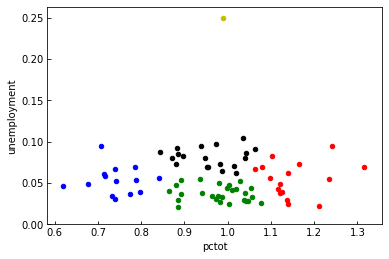

In [137]:
import pylab as pl
colors = ['r','b','y','k','g']
ax = pl.figure().add_subplot(111)
for i,c in enumerate(km.cluster_centers_):
    df_[df_.clusters == i].plot(x='pctot', y='unemployment', kind="scatter", color=colors[i], ax=ax)
pl.show()

Notice that I cannot overplot the cluster centers here, because the centeres are scaled. To add the centers I need to sinverse scale them.


In [138]:
df_.std(axis=0)

pctot           0.142984
unemployment    0.031211
clusters        1.603994
dtype: float64

In [139]:
tmp_ = df_.std(axis=0)
tmp_.pctot, tmp_.unemployment, km.cluster_centers_

(0.14298431865528724, 0.031211195938042308, array([[ 1.29452027, -0.09424321],
        [-1.59009674, -0.12685509],
        [ 0.15579631,  6.20506979],
        [-0.05801375,  0.7676328 ],
        [ 0.09242574, -0.6483789 ]]))

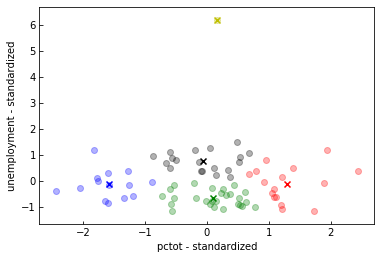

In [143]:
ax = pl.figure().add_subplot(111)
for i,c in enumerate(km.cluster_centers_):
    ax.scatter(Xscaled[km.labels_ == i][:,0], Xscaled[km.labels_ == i][:,1], color=colors[i], alpha=0.3)
    ax.scatter(c[0], c[1], color=colors[i], marker='x')
pl.xlabel('pctot - standardized')
pl.ylabel('unemployment - standardized')
pl.show()

 in a non-rigorous exploratory analysis, I can still clearly see that 5 clusters are too many, since tthe data is not well separated, except for a single point, which is likely an outliers